# GNN Training

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import os
import gc

from models.HeteroGAT import HeteroGAT
from models.Trainer import Trainer
from data_processing.config import DataProcessingConfig
from utils import visualize_graph

from dataloaders.GNNDataLoader import GNNDataLoader
from dataloaders.EdgeClassificationDataLoader import EdgeClassificationDataLoader  
from models.EdgeClassifier import RFClassifier, XGBClassifier
import pandas as pd

In [3]:
import torch.serialization
from torch_geometric.data.storage import BaseStorage

# Add BaseStorage class to safe globals for loading
torch.serialization.add_safe_globals([BaseStorage])

## Data Preparation

In [ ]:
# Scenarios
case_study = 'manhattan_case_study'
results_dir = os.path.join('..', 'studies', case_study, 'results')
scenario_names = [
    'test_manhattan_scenario_1',
    'test_manhattan_scenario_1',
    'test_manhattan_scenario_1',
]

scenarios = [os.path.join(results_dir, sc) for sc in scenario_names]

# Create config with shorter simulation duration for testing
config = DataProcessingConfig(
    sim_duration=3600,  # 1 hour instead of 24 hours
    test_mode=False,   # Process all available data
)

# Set to True only when data needs to be reprocessed
overwrite = True
pos_weight = 1.0

## GNN Model

In [5]:
# Safe data loading with error handling
def load_data_safely():
    gc.collect()  # Clean up memory before loading
    torch.cuda.empty_cache()  # Clear GPU cache if available

    loader = GNNDataLoader(scenarios, config, overwrite=overwrite, balance_edges=balance_edges, edge_balance_ratio=edge_balance_ratio)
    
    print("Processing data...")
    data, *masks = loader.load_data()
    # Validate loaded data
    if not data or len(data) == 0:
        raise ValueError("No data was loaded")

    return data, masks

data, masks = load_data_safely()
train_masks, val_masks, test_masks = masks if masks else (None, None, None)

Processing data...

=== Starting GNNDataLoader.load_data() ===
Total number of scenarios: 3
Train size: 1, Val size: 1

First pass: Processing training scenarios without normalization...



=== Processing scenario: test_manhattan_scenario_1 ===
Scenario path: ../studies/manhattan_case_study/results/test_manhattan_scenario_1
Overwrite mode: True

=== Processing raw data ===
Train directory: ../studies/manhattan_case_study/results/test_manhattan_scenario_1/train
Raw directory: data/raw
Checking directories exist:
- Train dir exists: True
- Raw dir exists: False

Initializing DataProcessor...

Processing data through pipeline...

=== DataProcessor.process_data() ===
Processing scenario: test_manhattan_scenario_1
Processed directory: data/test_manhattan_scenario_1/processed
Processing new data...

=== Processing timesteps ===
Processing 120 timesteps...
Simulation duration: 3600 seconds
Simulation step: 30 seconds
Processing timestep 0/3600

=== Loading timestep data for timestep 0 ===
Looking for data in: ../studies/manhattan_case_study/results/test_manhattan_scenario_1/train/0

Available files in timestep directory:
- vehicle_request_graph.pkl
Successfully loaded vehicle_r

/Users/hoda_hamdy/Documents/Projects/fleetpy/FleetPy/notebooks/dataloaders/GNNDataLoader.py:514: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1742433357773/work/torch/csrc/utils/tensor_new.cpp:281.)
  edge_index = torch.tensor(


Processed graphs saved to data/test_manhattan_scenario_1/processed/graph_data.pt

Computing global statistics across all training scenarios...

=== Computing global statistics ===

Processing request_features

Binary features (will be excluded from normalization):
  ['locked']

Metadata features (will be excluded from normalization):
  ['id', 'timestep']

Continuous features to be normalized:
  ['o_lat', 'o_lon', 'd_lat', 'd_lon', 'rq_time', 'tw_pe', 'tw_pl', 'direct_tt', 'direct_td', 'max_trip_time', 'status', 'time_until_earliest', 'time_until_latest', 'time_window_width', 'time_window_urgency', 'request_age', 'manhattan_distance', 'route_directness', 'origin_dest_bearing', 'nearby_requests', 'nearby_vehicles', 'demand_supply_ratio', 'in_degree_total', 'out_degree_total', 'in_degree_from_requests', 'out_degree_to_requests', 'in_degree_from_vehicles', 'out_degree_to_vehicles', 'request_vehicle_in_ratio', 'request_vehicle_out_ratio', 'clustering_coeff', 'nx_combined_degree_centrality',

Processing scenarios:   0%|          | 0/3 [00:00<?, ?it/s]


=== Processing scenario: test_manhattan_scenario_1 ===
Scenario path: ../studies/manhattan_case_study/results/test_manhattan_scenario_1
Overwrite mode: True

=== Processing raw data ===
Train directory: ../studies/manhattan_case_study/results/test_manhattan_scenario_1/train
Raw directory: data/raw
Checking directories exist:
- Train dir exists: True
- Raw dir exists: False

Initializing DataProcessor...

Processing data through pipeline...

=== DataProcessor.process_data() ===
Processing scenario: test_manhattan_scenario_1
Processed directory: data/test_manhattan_scenario_1/processed
Processing new data...

=== Processing timesteps ===
Processing 120 timesteps...
Simulation duration: 3600 seconds
Simulation step: 30 seconds
Processing timestep 0/3600

=== Loading timestep data for timestep 0 ===
Looking for data in: ../studies/manhattan_case_study/results/test_manhattan_scenario_1/train/0

Available files in timestep directory:
- vehicle_request_graph.pkl
Successfully loaded vehicle_r

Processing scenarios:  33%|███▎      | 1/3 [00:03<00:07,  3.88s/it]

Processed graphs saved to data/test_manhattan_scenario_1/processed/graph_data.pt

=== Processing scenario: test_manhattan_scenario_1 ===
Scenario path: ../studies/manhattan_case_study/results/test_manhattan_scenario_1
Overwrite mode: True

=== Processing raw data ===
Train directory: ../studies/manhattan_case_study/results/test_manhattan_scenario_1/train
Raw directory: data/raw
Checking directories exist:
- Train dir exists: True
- Raw dir exists: False

Initializing DataProcessor...

Processing data through pipeline...

=== DataProcessor.process_data() ===
Processing scenario: test_manhattan_scenario_1
Processed directory: data/test_manhattan_scenario_1/processed
Processing new data...

=== Processing timesteps ===
Processing 120 timesteps...
Simulation duration: 3600 seconds
Simulation step: 30 seconds
Processing timestep 0/3600

=== Loading timestep data for timestep 0 ===
Looking for data in: ../studies/manhattan_case_study/results/test_manhattan_scenario_1/train/0

Available files

Processing scenarios:  67%|██████▋   | 2/3 [00:07<00:03,  3.78s/it]

Processed graphs saved to data/test_manhattan_scenario_1/processed/graph_data.pt

=== Processing scenario: test_manhattan_scenario_1 ===
Scenario path: ../studies/manhattan_case_study/results/test_manhattan_scenario_1
Overwrite mode: True

=== Processing raw data ===
Train directory: ../studies/manhattan_case_study/results/test_manhattan_scenario_1/train
Raw directory: data/raw
Checking directories exist:
- Train dir exists: True
- Raw dir exists: False

Initializing DataProcessor...

Processing data through pipeline...

=== DataProcessor.process_data() ===
Processing scenario: test_manhattan_scenario_1
Processed directory: data/test_manhattan_scenario_1/processed
Processing new data...

=== Processing timesteps ===
Processing 120 timesteps...
Simulation duration: 3600 seconds
Simulation step: 30 seconds
Processing timestep 0/3600

=== Loading timestep data for timestep 0 ===
Looking for data in: ../studies/manhattan_case_study/results/test_manhattan_scenario_1/train/0

Available files

Processing scenarios: 100%|██████████| 3/3 [00:11<00:00,  3.77s/it]

Processed graphs saved to data/test_manhattan_scenario_1/processed/graph_data.pt
Scenario split: Train=1, Val=1, Test=1 scenarios
Timestep split: Train=120, Val=120, Test=120 timesteps


Visualizing graph 0 with 7 nodes and 6 edges.
True edges: 0, Predicted edges: 0


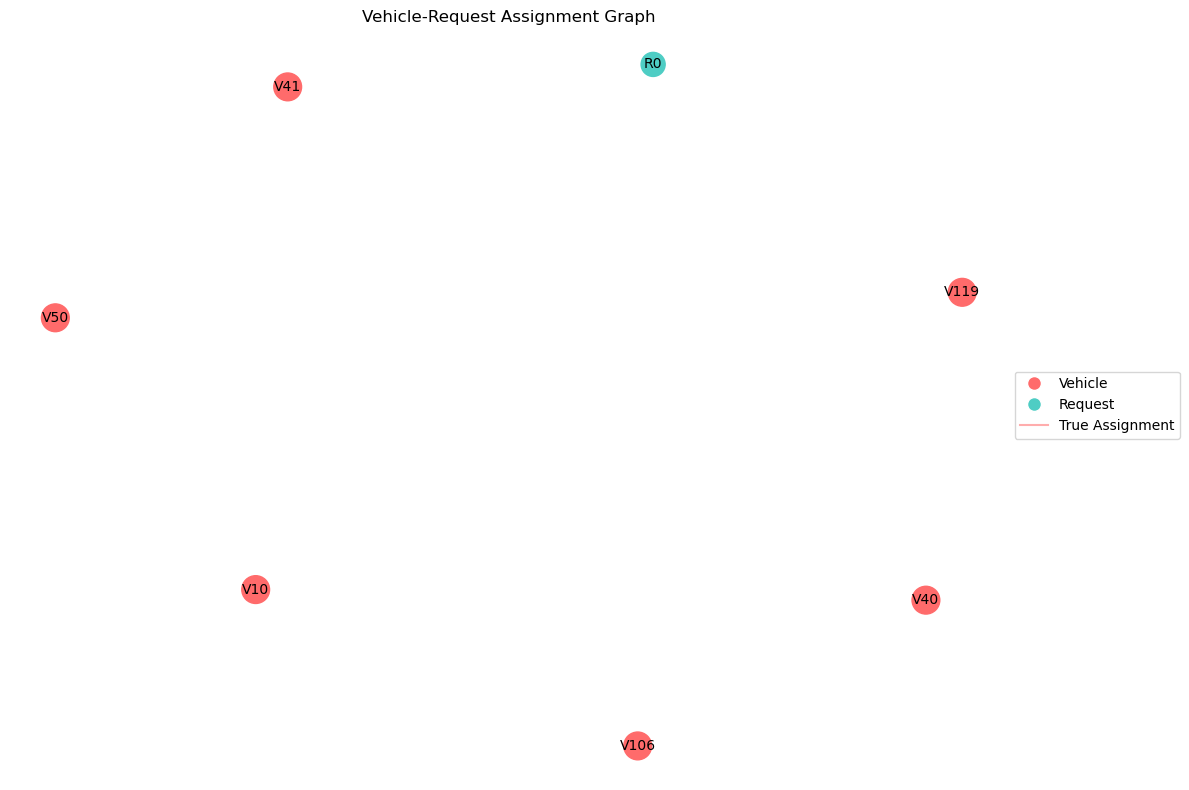

In [42]:
import numpy as np

graph_idx = 250  # Index of the graph to visualize
edge_index = data[graph_idx][('vehicle', 'connects', 'request')].edge_index
subset_vehicles = edge_index[0].unique().tolist()  # Unique vehicle indices with at least one edge
# subset_vehicles = [56, 74, 96, 168]
subset_requests = list(range(data[graph_idx]['request'].x.size(0)))
visualize_graph(data, 0, None, None, subset_nodes={'vehicle': subset_vehicles, 'request': subset_requests})

In [7]:
# Validate loaded data
if data is not None:
    print(f"Successfully loaded {len(data)} data points")
    print(f"Train/Val/Test split: {sum(train_masks)}/{sum(val_masks)}/{sum(test_masks)}")
else:
    print("Failed to load data. Please check the error message above.")

Successfully loaded 360 data points
Train/Val/Test split: 120/120/120


In [8]:
# Model parameters
num_classes = 1  # Binary classification - single output logit with sigmoid activation
hidden_channels = 128  # Size of hidden layers in GNN
epochs = 200  # Maximum number of training epochs (may stop earlier due to early stopping)
batch_size = 16  # Number of graphs per batch

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [9]:
# Initialize model with error handling
model = HeteroGAT(hidden_channels, num_classes).to(device=device)
print(f"Model initialized with {hidden_channels} hidden channels and {num_classes} output channel")

Model initialized with 128 hidden channels and 1 output channel


In [10]:
# Training setup with weighted BCE loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
trainer = Trainer(data, device, masks, config, batch_size=batch_size, epochs=epochs, pos_weight=pos_weight)

Initialized DynamicBatchSampler with 120 easy examples

Training Configuration
--------------------------------------------------------------------------------
Batch Size:          16
Max Epochs:          200
Device:              cpu
Pos Weight:          1.0000
--------------------------------------------------------------------------------


In [11]:
# Training with progress tracking and error handling
try:
    # Add numpy scalar to safe globals before training
    import torch.serialization
    torch.serialization.add_safe_globals(['numpy._core.multiarray.scalar'])

    # Start training
    trainer.train(model, optimizer)
except Exception as e:
    print(f"Error during training: {str(e)}")
    # Print more detailed error information
    import traceback
    traceback.print_exc()

Error during training: '_SingleProcessDataLoaderIter' object has no attribute 'next'


Traceback (most recent call last):
  File "/var/folders/tw/f3j1pqdj5wz0kzj6_tpd5vbc0000gn/T/ipykernel_33227/1370486664.py", line 8, in <module>
    trainer.train(model, optimizer)
  File "/Users/hoda_hamdy/Documents/Projects/fleetpy/FleetPy/notebooks/models/Trainer.py", line 262, in train
    train_metrics = self.train_epoch(model, optimizer, criterion)
  File "/Users/hoda_hamdy/Documents/Projects/fleetpy/FleetPy/notebooks/models/Trainer.py", line 358, in train_epoch
    batch = DataLoader(batch_data, batch_size=len(batch_data), shuffle=False).__iter__().next()
AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'


# RF

In [12]:
# overwrite = False

In [13]:
# def get_classifications(classifier_cls, dataloader):
#     n_estimators = 100
#     classifier = classifier_cls(dataloader, n_estimators=n_estimators)
#     return classifier.classify_edges()

In [14]:
# edge_type = 'vr_graph'
# load_dir = os.path.join(config.base_data_dir, config.train_dir, '_20250716_163457')
# load_dir = None  # Set to None to use default loading behavior
# dataloader = EdgeClassificationDataLoader(scenarios, edge_type, config, overwrite, load_dir=load_dir)
# y_val_proba_vr, y_test_proba_vr = get_classifications(RFClassifier, dataloader)
# # y_val_proba_vr_xgb, y_test_proba_vr_xgb = get_classifications(XGBClassifier, dataloader)

In [15]:
# edge_type = 'rr_graph'
# load_dir = os.path.join(config.base_data_dir, config.train_dir, '_20250717_131757')
# # load_dir = None  # Set to None to use default loading behavior
# dataloader = EdgeClassificationDataLoader(scenarios, edge_type, config, overwrite, load_dir=load_dir)
# y_val_proba_rr, y_test_proba_rr = get_classifications(RFClassifier, dataloader)
# # y_val_proba_rr_xgb, y_test_proba_rr_xgb = get_classifications(XGBClassifier, dataloader)

In [16]:
# (X_train, y_train), (X_val, y_val), (X_test, y_test) = dataloader.load_data()

In [17]:
# # Hyperparameter tuning for RF and XGB classifiers
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# # Prepare data for scikit-learn (RF/XGB expect numpy arrays)
# X_train_np = X_train.to_numpy()
# y_train_np = y_train.to_numpy()
# X_val_np = X_val.to_numpy()
# y_val_np = y_val.to_numpy()

# # Random Forest hyperparameter grid
# tuned_parameters_rf = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'class_weight': ['balanced']
# }
# rf = RandomForestClassifier(random_state=42)
# gs_rf = GridSearchCV(rf, tuned_parameters_rf, cv=3, scoring='f1', n_jobs=-1, verbose=2)
# gs_rf.fit(X_train_np, y_train_np)
# print('Best RF params:', gs_rf.best_params_)
# print('Best RF F1 score:', gs_rf.best_score_)

# # XGBoost hyperparameter grid
# tuned_parameters_xgb = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 6, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
# }
# xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# gs_xgb = GridSearchCV(xgb, tuned_parameters_xgb, cv=3, scoring='f1', n_jobs=-1, verbose=2)
# gs_xgb.fit(X_train_np, y_train_np)
# print('Best XGB params:', gs_xgb.best_params_)
# print('Best XGB F1 score:', gs_xgb.best_score_)


In [18]:
# edge_type = 'rr_graph'
# dataloader_rr = EdgeClassificationDataLoader(scenarios, edge_type, config, overwrite)
# y_val_proba_rr, y_test_proba_rr = get_classifications(RFClassifier, dataloader)
# y_val_proba_rr_xgb, y_test_proba_rr_xgb = get_classifications(XGBClassifier, dataloader)

In [19]:
# df = pd.DataFrame({
#     # 'y_val_proba': y_val_proba_vr,
#     'y_val_pred': y_val_proba_vr > 0.3,
#     'edge_init_label': X_val['edge_init_label'],
#     'label': y_val.squeeze()
# })

# df.value_counts()

In [20]:
# df[df.label == 1].value_counts(normalize=True)

In [21]:
# df_xgb = pd.DataFrame({
#     # 'y_val_proba': y_val_proba_vr,
#     'y_val_pred': y_val_proba_rr > 0.3,
#     'edge_init_label': X_val['edge_init_label'],
#     'label': y_val['label']
# })

# df_xgb.value_counts()

In [22]:
# df_xgb[df_xgb.label == 1].value_counts(normalize=True)

In [23]:
# Diagnostic cell to understand node_ids and edge_index mapping
import torch

def inspect_graph_node_mapping(graph_data, graph_idx=0, max_examples=5):
    """
    Inspect how node_ids map to PyG's internal indices in the edge_index tensor.
    This helps verify that we're correctly interpreting the edge connections.
    """
    graph = graph_data[graph_idx]
    
    print("=== Graph Structure Analysis ===")
    
    # Print node types and their features
    for node_type in ['request', 'vehicle']:
        if hasattr(graph[node_type], 'x') and hasattr(graph[node_type], 'node_ids'):
            print(f"\n{node_type.capitalize()} Nodes:")
            print(f"- Number of {node_type} nodes: {graph[node_type].x.shape[0]}")
            print(f"- Feature dimensions: {graph[node_type].x.shape[1]}")
            
            # Show a few example node IDs
            ids = graph[node_type].node_ids.numpy()
            print(f"- Sample node_ids: {ids[:max_examples]} {'...' if len(ids) > max_examples else ''}")
    
    # Print edge types and their connections
    edge_type = ('vehicle', 'connects', 'request')
    if hasattr(graph[edge_type], 'edge_index'):
        print(f"\nEdge Type: {edge_type}")
        edge_index = graph[edge_type].edge_index
        print(f"- Number of edges: {edge_index.shape[1]}")
        
        # Show a few example edges with their node IDs
        print("\n=== Example Edge Mappings ===")
        print("Internal Index -> Actual Node ID")
        for i in range(min(max_examples, edge_index.shape[1])):
            src_idx = edge_index[0, i].item()
            dst_idx = edge_index[1, i].item()
            
            # Map internal indices to actual node IDs
            src_id = graph['vehicle'].node_ids[src_idx].item()
            dst_id = graph['request'].node_ids[dst_idx].item()
            
            print(f"Edge {i}: ({src_idx} -> {dst_idx}) maps to Vehicle ID {src_id} -> Request ID {dst_id}")
        
        # Verify that indices in edge_index are within bounds
        max_vehicle_idx = graph['vehicle'].x.shape[0] - 1
        max_request_idx = graph['request'].x.shape[0] - 1
        
        valid_vehicle_indices = (edge_index[0] >= 0) & (edge_index[0] <= max_vehicle_idx)
        valid_request_indices = (edge_index[1] >= 0) & (edge_index[1] <= max_request_idx)
        
        if not torch.all(valid_vehicle_indices):
            print(f"WARNING: Some vehicle indices in edge_index are out of bounds!")
            invalid_indices = edge_index[0][~valid_vehicle_indices].unique().tolist()
            print(f"Invalid vehicle indices: {invalid_indices}")
        
        if not torch.all(valid_request_indices):
            print(f"WARNING: Some request indices in edge_index are out of bounds!")
            invalid_indices = edge_index[1][~valid_request_indices].unique().tolist()
            print(f"Invalid request indices: {invalid_indices}")
        
        print("\n=== Summary ===")
        print(f"All indices valid: {torch.all(valid_vehicle_indices) and torch.all(valid_request_indices)}")

# Run the inspection function
if data is not None and len(data) > 0:
    inspect_graph_node_mapping(data)
else:
    print("No data available to inspect.")

=== Graph Structure Analysis ===

Request Nodes:
- Number of request nodes: 1
- Feature dimensions: 43
- Sample node_ids: [3179577] 

Vehicle Nodes:
- Number of vehicle nodes: 120
- Feature dimensions: 23
- Sample node_ids: [0 1 2 3 4] ...

Edge Type: ('vehicle', 'connects', 'request')
- Number of edges: 25

=== Example Edge Mappings ===
Internal Index -> Actual Node ID
Edge 0: (2 -> 0) maps to Vehicle ID 2 -> Request ID 3179577
Edge 1: (3 -> 0) maps to Vehicle ID 3 -> Request ID 3179577
Edge 2: (6 -> 0) maps to Vehicle ID 6 -> Request ID 3179577
Edge 3: (10 -> 0) maps to Vehicle ID 10 -> Request ID 3179577
Edge 4: (11 -> 0) maps to Vehicle ID 11 -> Request ID 3179577

=== Summary ===
All indices valid: True


In [24]:
# Demonstrating how to correctly map predictions back to original node IDs
def get_vehicle_request_assignments(graph, predictions=None, threshold=0.5):
    """
    Maps edge predictions back to original vehicle and request IDs.
    
    Args:
        graph: A heterogeneous graph from your dataset
        predictions: Optional edge prediction tensor (1 = assignment, 0 = no assignment)
                    If None, we'll use the ground truth labels if available
        threshold: Probability threshold for binary predictions (if predictions are continuous)
    
    Returns:
        List of (vehicle_id, request_id) tuples representing assignments
    """
    edge_type = ('vehicle', 'connects', 'request')
    
    # Get edge index
    edge_index = graph[edge_type].edge_index
    
    # Get assignment tensor (either predictions or ground truth)
    if predictions is not None:
        # If predictions are probabilities, convert to binary using threshold
        if predictions.dtype == torch.float:
            assignments = predictions > threshold
        else:
            assignments = predictions
    elif hasattr(graph[edge_type], 'y'):
        # Use ground truth if available
        assignments = graph[edge_type].y == 1
    else:
        print("No predictions or ground truth labels available")
        return []
    
    # Map assignments to vehicle and request IDs
    assigned_pairs = []
    for i, is_assigned in enumerate(assignments):
        if is_assigned:
            # Get internal indices from edge_index
            src_idx = edge_index[0, i].item()
            dst_idx = edge_index[1, i].item()
            
            # Map to original IDs using node_ids
            vehicle_id = graph['vehicle'].node_ids[src_idx].item()
            request_id = graph['request'].node_ids[dst_idx].item()
            
            assigned_pairs.append((vehicle_id, request_id))
    
    return assigned_pairs

# Test the function on the first graph (if data is available)
if data is not None and len(data) > 0:
    # Get assignments based on ground truth
    graph = data[0]
    assignments = get_vehicle_request_assignments(graph)
    
    print("=== Vehicle-Request Assignments (based on ground truth) ===")
    print(f"Found {len(assignments)} assignments")
    
    # Print a few examples
    for i, (vehicle_id, request_id) in enumerate(assignments[:5]):
        print(f"Assignment {i+1}: Vehicle {vehicle_id} → Request {request_id}")
    
    if len(assignments) > 5:
        print("...")
else:
    print("No data available to demonstrate assignments.")

=== Vehicle-Request Assignments (based on ground truth) ===
Found 1 assignments
Assignment 1: Vehicle 11 → Request 3179577


In [25]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import TensorDataset, DataLoader
# from sklearn.preprocessing import StandardScaler
# import numpy as np


# def train_mlp_classifier(X_train, y_train, X_val, y_val, edge_type='vr_graph'):
#     # Keep only rows where all features are not NaN
#     valid_rows = ~X_train.isna().any(axis=1)

#     # Apply to both X and y
#     X_train = X_train[valid_rows]
#     y_train = y_train[valid_rows]

#     # Define categorical features for one-hot encoding
#     categorical_features = [
#         'src_status', 'src_type', 'tgt_status',
#     ] if edge_type == 'vr_graph' else [
#         'src_status', 'tgt_status'
#     ]

#     # Create a column transformer for one-hot encoding
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('cat', OneHotEncoder(), categorical_features)
#         ],
#         remainder='passthrough'  # Keep other features as they are
#     )
#     # Create a pipeline with preprocessing and classifier
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#     ])
#     pipeline.fit(X_train, y_train)
#     # Transform the data
#     X_train = pipeline.transform(X_train).astype(np.float32)  # Ensure float32 for PyTorch
#     X_val = pipeline.transform(X_val).astype(np.float32)  # Ensure float32 for PyTorch

#     # X_train = X_train.to_numpy(dtype=np.float32)  # From your processed DataFrame
#     y_train = y_train.to_numpy(dtype=np.int64)

#     # X_val = X_val.to_numpy(dtype=np.float32)  # From your processed DataFrame
#     y_val = y_val.to_numpy(dtype=np.int64)


#     # Optional: scale features (good for MLPs)
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_val = scaler.transform(X_val)

#     # Convert to torch tensors
#     train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
#     val_dataset = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))

#     train_loader = DataLoader(train_dataset, batch_size=64)
#     val_loader = DataLoader(val_dataset, batch_size=64)

#     # Define your MLP model
#     class MLPClassifier(nn.Module):
#         def __init__(self, input_dim):
#             super(MLPClassifier, self).__init__()
#             self.fc1 = nn.Linear(input_dim, 128)
#             self.fc2 = nn.Linear(128, 64)
#             self.out = nn.Linear(64, 1)  # Binary classification

#         def forward(self, x):
#             x = F.relu(self.fc1(x))
#             x = F.relu(self.fc2(x))
#             x = self.out(x)
#             return x  # raw logits

#     # Initialize model
#     input_dim = X_train.shape[1]
#     model = MLPClassifier(input_dim)
#     pos_weight = torch.tensor([(len(y_train) - y_train.sum()) / y_train.sum()])  # Calculate positive weight
#     criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)  # works directly with logits
#     optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

#     # Training loop
#     n_epochs = 50
#     for epoch in range(n_epochs):
#         model.train()
#         total_loss = 0
#         for xb, yb in train_loader:
#             optimizer.zero_grad()
#             logits = model(xb)#.squeeze()
#             loss = criterion(logits, yb.float())
#             loss.backward()
#             optimizer.step()
#             total_loss += loss.item()

#         # Validation
#         model.eval()
#         all_preds = []
#         all_labels = []
#         with torch.no_grad():
#             for xb, yb in val_loader:
#                 logits = model(xb).squeeze()
#                 preds = (torch.sigmoid(logits) > 0.5).long()
#                 all_preds.extend(preds.cpu().numpy())
#                 all_labels.extend(yb.cpu().numpy())
#         print(classification_report(all_labels, all_preds))

In [26]:
# train_mlp_classifier(X_train, y_train, X_val, y_val, edge_type='vr_graph')

## Node IDs and Graph Visualization

Understanding how node IDs work in PyTorch Geometric is crucial for our fleet dispatching application. The relationship between internal PyG indices and real-world entity IDs is handled through the `node_ids` attribute:

1. **Internal Indices vs. Original IDs**:
   - PyG uses 0-indexed contiguous internal indices for efficient graph operations
   - Original entity IDs (like request or vehicle IDs) are preserved in the `node_ids` attribute
   - Edge connections use internal indices, not the original IDs

2. **How the Mapping Works**:
   - When creating edges with `edge_index`, we use PyG's internal indices (0, 1, 2, etc.)
   - To convert back to original entity IDs, we use: `original_id = graph[node_type].node_ids[internal_idx]`
   - This mapping is essential when applying model predictions to the real fleet system

Let's visualize a sample graph from our dataset and analyze model predictions using this mapping.

### Graph Visualization Functions

The following cells implement visualization functionality for our heterogeneous graph neural network:

1. Node visualization:
   - Vehicles: red nodes
   - Requests: turquoise nodes

2. Edge visualization:
   - True assignments: solid red lines
   - Non-assignments: dotted gray lines
   - Predicted assignments: semi-transparent blue lines (with probability scores)

3. Additional features:
   - Node labels (V for vehicles, R for requests)
   - Edge probability labels for predicted assignments
   - Comprehensive legend
   - Force-directed layout for clear visualization

In [27]:
# visualize_graph(data, graph_idx=0, model=model, device=device)